<a href="https://colab.research.google.com/github/Wanita-8943/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [6]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [8]:
Name = 'วานิตา สมเด็จ'
ID = '6230205365'

In [7]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [10]:
Data = DataGenerator(Name,ID)

020:30:13


In [11]:
Data #ข้อมูลทั้งหมด

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.122979,-3.295591,-1.905968,8.807450,3.436086,-7.863223,7.261924,-2.483273,5.677271,-1.384419,-5.713879,-0.701148,-4.897625,-6.022824,-4.822365,2.341001,-1.972514,9.505130,2.176511,-7.749094,7.020367,-4.584958,-8.326107,-4.272719,4.336434,-5.695388,-2.706593,8.540504,10.424226,2.216951,-6.591182,13.084756
1,-1.178806,-1.705041,-2.304133,8.370834,5.129572,-7.872284,4.108793,-2.045335,6.425141,-2.940128,-7.962174,0.004099,-6.024449,-7.155523,-3.888844,1.612577,-0.771112,8.855043,2.296529,-8.149986,5.307715,-5.962821,-7.641550,-3.307962,3.394114,-4.219148,-2.052904,10.047594,10.208270,4.121820,-3.410083,22.609099
2,0.904578,4.691859,-3.682533,-2.953914,5.427658,-7.973544,-6.298981,-5.837808,-6.806116,4.240747,-6.726297,-2.661466,2.331365,-2.299572,-3.537591,2.937966,7.014755,-2.094251,-7.833492,7.046922,6.967556,-3.341271,3.557202,-1.224863,4.301185,-6.613338,-8.054432,8.960152,8.176317,-4.350617,9.383718,-19.753085
3,-8.309558,-0.700731,-6.674782,6.733736,8.064153,-9.515225,9.423268,10.051663,5.773942,2.191188,-6.168410,-3.242995,7.661962,-3.454031,-6.803181,-4.604935,0.994939,-9.752362,6.206699,-7.746425,-2.671065,-8.756579,3.640509,-3.570759,5.755518,3.337119,-2.788030,-9.860391,8.703038,3.645643,-1.401462,20.228213
4,8.340888,-8.214758,-5.512123,-1.567990,5.905051,8.980198,8.079326,3.190559,-0.398816,-1.669538,5.329574,3.758042,2.629444,-2.314456,6.568466,6.071499,-5.243972,3.210821,6.460610,-11.300239,-9.199506,9.716673,6.044433,4.530647,6.792402,-5.300715,-8.420804,5.595060,0.070567,6.126067,-16.429515,32.630334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.621194,3.082826,-6.051600,-9.254466,5.131143,0.667478,-1.629920,-1.360385,-1.946909,-4.092077,2.009247,1.749112,-3.929099,-1.599213,-3.747115,1.836762,-7.503489,3.989790,5.298064,-6.293570,5.447109,-3.485855,3.683923,5.746130,5.880837,2.346970,2.474427,0.988740,-2.332277,0.787062,6.165651,5.935309
9996,-0.565152,4.502084,-4.958137,-1.130835,6.393298,-10.045349,-5.483434,-6.521711,-3.976157,2.130145,-7.738335,-2.840233,1.204603,-4.691612,-2.654711,1.921697,7.099371,-0.297220,-10.052557,7.396492,6.868344,-2.660437,2.540235,-0.749447,4.566415,-7.151448,-8.291589,8.715938,5.509624,-7.029211,9.004169,-33.146053
9997,5.458936,6.669342,-9.677379,-4.951354,5.975153,0.109411,9.595156,0.086257,6.671417,-0.332043,7.129822,-5.413321,-0.944951,-0.779493,-1.810268,6.062982,-3.143105,-2.785437,-1.798621,-2.375633,2.291665,-6.591749,4.390090,-3.670793,11.363186,-6.152867,4.829156,-1.963335,-7.680129,4.356970,13.338685,23.784849
9998,5.167506,9.960286,5.908806,-5.992349,-6.306272,-2.778985,11.405055,1.561802,7.698767,-9.825561,5.709468,-9.183920,-9.588192,-11.000842,-5.495952,-3.846113,9.210216,7.947077,0.979926,6.075725,-9.279143,4.291894,-9.643116,-6.771529,8.741895,-2.417855,6.372045,1.503416,3.849181,4.402622,19.920572,24.013108


#**2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [17]:
Data.shape  #จะเห็นได้ว่า มี data 10000 ตัว และ dimension ที่ Run ออกมามีทั้งหมด 32 dimension

(10000, 32)

#**clustering** 

Import

In [25]:
from sklearn.cluster import KMeans

Define

In [27]:
kmeans = KMeans(random_state=2021) #หาค่า kmeans
#random state คือจะทำให้มีค่าตรงกันมากที่สุด

Fit-Transform

In [69]:
kmeans.fit(Data) # ไว้เเสดง จุด cluster centers ที่คำนวณออกมาได้

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_ #เอาไว้หาจุดศูนย์กลางของข้อมูล

array([[-3.63126731e+00, -2.21272742e+00, -4.91946255e+00,
         8.21931883e+00,  5.62424329e+00, -7.78435110e+00,
         6.69930926e+00,  2.59944150e+00,  6.34364609e+00,
         3.74593986e-01, -6.56408139e+00, -1.00806471e+00,
         1.32121437e+00, -4.99447916e+00, -5.53282563e+00,
        -2.42435519e+00,  2.91543386e-01, -6.13465297e-01,
         3.25077574e+00, -7.61301774e+00,  1.87439711e+00,
        -6.51551107e+00, -2.88111443e+00, -4.11406387e+00,
         4.04676659e+00, -1.06373383e+00, -3.32195202e+00,
         3.80757458e-02,  9.84082630e+00,  2.76321150e+00,
        -4.42545484e+00,  1.58160575e+01],
       [-4.24513971e-01,  4.41983209e+00, -4.84945412e+00,
        -3.58686735e+00,  5.96374717e+00, -8.96207334e+00,
        -4.70838398e+00, -5.94458586e+00, -5.59174800e+00,
         3.26748124e+00, -7.56320707e+00, -2.11044982e+00,
         2.25315025e+00, -3.53065610e+00, -3.70923433e+00,
         2.14593996e+00,  6.69113235e+00, -1.68840695e+00,
        -9.04

ทดสอบการจัดกลุ่มของ Data

In [30]:
y = kmeans.predict(Data) #เพื่อนำค่า Y ที่ได้นำไป plot กราฟต่อไป
y

array([0, 0, 1, ..., 5, 5, 6], dtype=int32)

###ทำ PCA เพื่อลด Dimension ของข้อมูลเนื่องจากมีจำนวน Dimension ที่เยอะเกินไป

ทำ PCA ข้อมูล Data แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง



**Import**

In [31]:
from sklearn.decomposition import PCA

**Define**

In [70]:
pca = PCA(n_components=2) #เรากำหนดให้เอาแค่ 2 dimension

In [33]:
new_pca = pca.fit_transform(Data)

In [34]:
new_pca.shape

(10000, 2)

###ค่าจริง

In [36]:
from matplotlib import pyplot as plt #เพิ่ม matplotlib เพื่อนำมาไว้ plot กราฟ

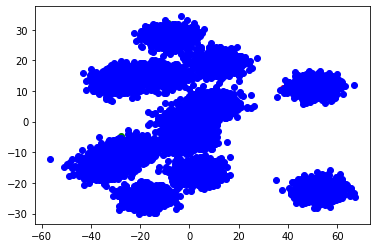

In [72]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'ob')

#สีจริง คำตอบที่แท้จริง แบบธรรมดาทำ PCA กี่รอบก็ได้เท่าเดิม เพราะมองในมุมองที่ data กระจายดีที่สุด
#สีฟ้ากระจายและทับสีอื่นไปหมด

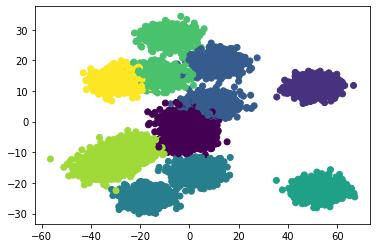

In [40]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

นี้คือกราฟที่เรา plot ได้จากการทำ Kmean

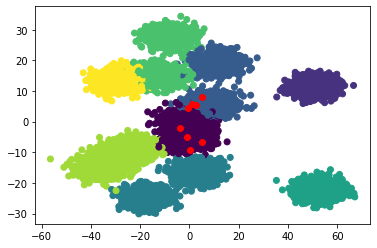

In [41]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # เป็นการหา cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

กราฟนี้จะแสดง cluster center เราจะเห็นได้ว่าจุดศูนย์กลางของกราฟ cluster center คือจุดที่เป็นสีแดง

#Elbow method

-elbow method จะ plot กราฟคล้ายๆศอก
-SSE วัดระยะห่างของ center ทุกๆจุดว่าห่างกันเท่าไหร่ จากนั้นเอามา sum รวมกัน
-ใกล้กับ center มากยิ่งดี

In [42]:
kmeans.inertia_  #หาค่า SSE (Sum of Squared Errors) #ไม่ต้องหาใหม่เลยเนื่องจาก kmeans หามาไว้ให้เเล้ว

4223015.069657261

SSE (Sum of Squared Errors)

In [43]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)
     #วนลูปเพื่อจะเปลี่ยน k จาก 1 เป็น2,3,4,5,6,7,8

In [44]:
SSE #ได้ค่าทั้งหมด 8 ตัว

[17376235.56078428,
 12379473.796194354,
 10129784.269352978,
 8730523.544304458,
 7615456.759086133,
 6520299.778351892,
 5320747.510562791,
 4223015.069657261]

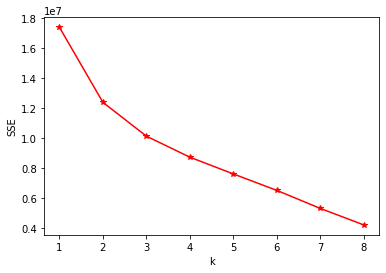

In [48]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'*-r') 
plt.xlabel('k')
plt.ylabel('SSE');
#นำค่า  SSE มา plot กราฟ
#elbow-ศอก

#silhouette coefficient (ซีลูอิท โคแอฟฟิเซียน)
1.How close the data point is to other points in the cluster คำนวณว่า data แต่ละอันที่อยู่ในกลุ่มเดียวกันมันอยู่ใกล้กับจุดอื่น ๆ ในคลัสเตอร์อย่างไร

2.How far away the data point is from points in other clusters จุดข้อมูลอยู่ห่างจากจุดในคลัสเตอร์อื่นแค่ไหน๒

In [73]:
from sklearn import metrics

In [50]:
SilH = list() #silhouette scores คิดข้อมูลที่มีกลุ่มเดียวไม่ได้
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

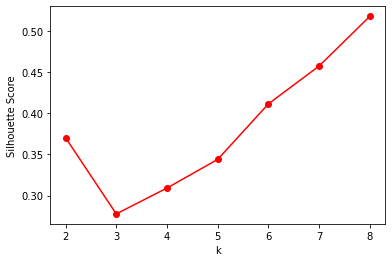

In [74]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-r')
plt.xlabel('k')
plt.ylabel('Silhouette Score');
 #ดูกราฟจากจุด silhouette scores ที่สูงที่สุด มีค่ามากแสดงว่าใกล้กันมาก มีค่าตั้งแต่-1ถึง 1  #ดีที่สุดคือ 8 เพราะสูงสุด

###**3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**


####MDS
MDS จะพยายาม plot graph ใหม่ให้ dimensions ลดลงแต่จะพยายามรักษาระยะห่าง จุดไหนใกล้กับจุดไหนมาก จุดไหนใกล้กับจุดไหนน้อย

In [59]:
from sklearn.manifold import MDS

In [58]:
mds = MDS(n_components=2) #กำหนดให้ components = 2

In [60]:
New_mds = mds.fit_transform(Data) #คำนวณระยะห่างระหว่างจุด #รันนานมากเด้อ

In [61]:
kmeans2 = KMeans(n_clusters=8,random_state=2021)  #ให้ k= 8   ตามที่หาไว้ #กำหนดค่า random เพื่อให้ค่าเหมือนกันทุกตัว
kmeans2.fit(Data)
g = kmeans2.predict(Data)

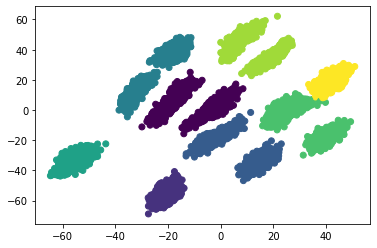

In [64]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y)

ข้อมูลมีการกระจายตัวมากกว่าข้อ 2 เนื่องจากมีการกระจายตัวมากขึ้นของข้อมูล ไม่มีการทับซ้อนกันจนเป็นกลุ่มก้อนใหญ่ ก็คือข้อมูลมีการกระจายตัว

###**4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**


กราฟของข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

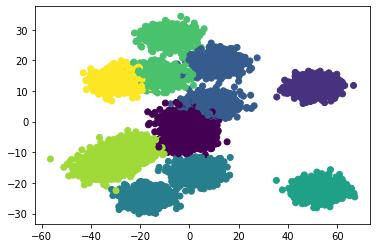

In [65]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
#ข้อมูลมีการซ้อนทับกันเป็นกลุ่มก้อนขนาดใหญ่

กราฟของข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ



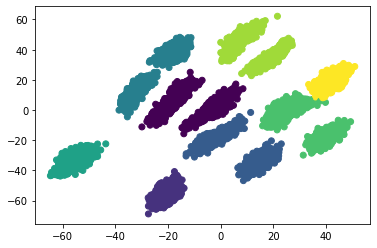

In [66]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(New_mds[:,0],New_mds[:,1],c=y) 
# กราฟมีการกระจายตัวและข้อมูลลไม่มีการทับซ้อนกันจนเป็นกลุ่มก้อนใหญ่

จากการเปรียบเทียบข้อ 2 กับ ข้อ 3 จะเห็นได้ชัดว่าถ้าเราลด dimension แล้วค่อยทำ clustering จะเห็นว่ากราฟข้อ 3 มีการกระจายข้อมูลที่เปลี่ยนไป และลักษณะการกระจายข้อมูลดูเล็กลง เพราะ dimension ลดลง และระยะห่างยังคงเดิม แต่ข้อ 2 การกระจายของข้อมูลมีขนาดใหญ่ และอยู่กันเป็นกลุ่ม